In [38]:
rm(list = ls())

library(dplyr)
library(ggplot2)
library(readr)
library(tidyverse)
library(viridis)
library(ggmap)
library(sf)
library(data.table)
library(bit64)
library(corrplot)

setwd("C:/Users/momaleki/Desktop/Project")
getwd()

df_No_SCI <- fread("Data/ToMerge/df_No_SCI.csv")
df_No_SCI <- df_No_SCI[, -c(1)]
df <- df_No_SCI
df <- df[, -c(8:14, 26:28 )]
colnames(df) <- c('NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS', 'FIPS', 
                  'Combined', 'Percent_Less_HS', 'Percent_HS', 'Percent_Less_College', 'Percent_Higher_College', 
                 'Trump_Win', 'Biden_Win', 'LAT', 'Lon', 'Unemployment', 'Movement_Change', 'Percent_InTouch', 
                 'Percent_Rural', 'Pop_Density', 'Poverty', 'COVID_Confirmed', 'COVID_Death', 'Percent_Ess_Workers', 
                 'Hospital_AllBeds', 'Hospital_Occ_rate', 'COVID_TestCap', 'COVID_Testing', 'COVID_Clinic', 
                 'Vaccine', 'Crime')


df <- df[, -c(14:15)]




head(df)

[1] "C:/Users/momaleki/Desktop/Project"

NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,FIPS,Combined,Percent_Less_HS,Percent_HS,Percent_Less_College,...,COVID_Confirmed,COVID_Death,Percent_Ess_Workers,Hospital_AllBeds,Hospital_Occ_rate,COVID_TestCap,COVID_Testing,COVID_Clinic,Vaccine,Crime
0.026,0.006,0.106,0.051,0.811,10001,4.615,0.126,0.329,0.308,...,12.73077,0.0000000,0.5107970,562,0.8000000,327.2231,578.2308,1,0.1305243,534.1880
0.026,0.006,0.106,0.051,0.811,10001,4.615,0.126,0.329,0.308,...,12.73077,0.0000000,0.5107970,562,0.8000000,327.2231,578.2308,1,0.1305243,534.1880
0.026,0.006,0.106,0.051,0.811,10001,4.615,0.126,0.329,0.308,...,12.73077,0.0000000,0.5107970,203,0.4783451,327.2231,578.2308,1,0.1305243,534.1880
0.026,0.006,0.106,0.051,0.811,10001,4.615,0.126,0.329,0.308,...,12.73077,0.0000000,0.5107970,203,0.4783451,327.2231,578.2308,1,0.1305243,534.1880
0.027,0.013,0.041,0.133,0.786,10003,4.638,0.084,0.308,0.246,...,59.81538,0.5076923,0.4013385,315,0.2345205,358.1154,1991.7308,1,0.1589297,581.7888
0.027,0.013,0.041,0.133,0.786,10003,4.638,0.084,0.308,0.246,...,59.81538,0.5076923,0.4013385,315,0.2345205,358.1154,1991.7308,1,0.1589297,581.7888


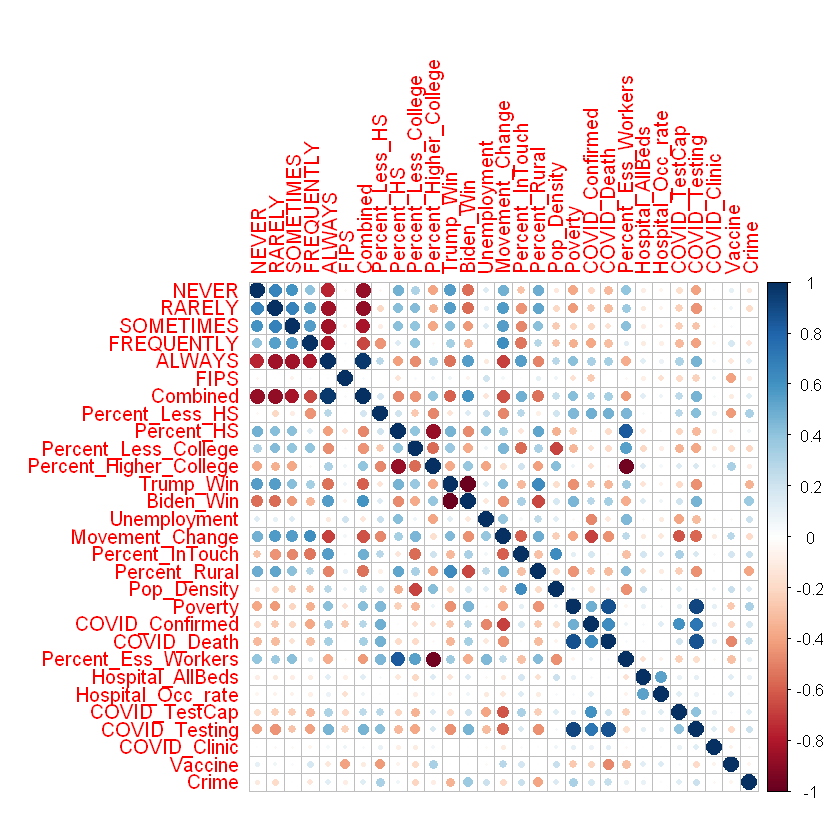

In [39]:
df.cor <- cor(df)
corrplot(df.cor)

In [40]:
regression <- lm(data = df, 
                  df$ALWAYS ~  df$Trump_Win)

summary(regression)


Call:
lm(formula = df$ALWAYS ~ df$Trump_Win, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49003 -0.02119  0.01397  0.03797  0.31881 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7180260  0.0002863  2507.6   <2e-16 ***
df$Trump_Win -0.1528401  0.0007477  -204.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08245 on 97170 degrees of freedom
Multiple R-squared:  0.3007,	Adjusted R-squared:  0.3007 
F-statistic: 4.178e+04 on 1 and 97170 DF,  p-value: < 2.2e-16


In [41]:
regression <- lm(data = df, 
                  df$NEVER ~  df$Trump_Win)

summary(regression)


Call:
lm(formula = df$NEVER ~ df$Trump_Win, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06819 -0.00890 -0.00490  0.00410  0.36381 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.790e-02  7.368e-05   378.7   <2e-16 ***
df$Trump_Win 4.029e-02  1.924e-04   209.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02122 on 97170 degrees of freedom
Multiple R-squared:  0.311,	Adjusted R-squared:  0.311 
F-statistic: 4.386e+04 on 1 and 97170 DF,  p-value: < 2.2e-16


In [42]:
regression <- lm(data = df, 
                  df$ALWAYS ~  df$Percent_Higher_College)

summary(regression)


Call:
lm(formula = df$ALWAYS ~ df$Percent_Higher_College, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49274 -0.04077  0.01226  0.05727  0.22163 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.580342   0.001120   518.3   <2e-16 ***
df$Percent_Higher_College 0.333505   0.003122   106.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09327 on 97170 degrees of freedom
Multiple R-squared:  0.1051,	Adjusted R-squared:  0.1051 
F-statistic: 1.141e+04 on 1 and 97170 DF,  p-value: < 2.2e-16


In [43]:
regression <- lm(data = df, 
                  df$NEVER ~  df$Percent_Higher_College)

summary(regression)


Call:
lm(formula = df$NEVER ~ df$Percent_Higher_College, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05995 -0.01262 -0.00633  0.00430  0.38343 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.0703565  0.0002817   249.8   <2e-16 ***
df$Percent_Higher_College -0.1057429  0.0007854  -134.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02347 on 97170 degrees of freedom
Multiple R-squared:  0.1572,	Adjusted R-squared:  0.1572 
F-statistic: 1.813e+04 on 1 and 97170 DF,  p-value: < 2.2e-16


In [44]:
regression <- lm(data = df, 
                  df$ALWAYS ~  df$Percent_Rural)

summary(regression)


Call:
lm(formula = df$ALWAYS ~ df$Percent_Rural, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44550 -0.02469  0.01804  0.04026  0.41869 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.7171378  0.0002992  2397.0   <2e-16 ***
df$Percent_Rural -0.3494084  0.0019464  -179.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08544 on 97170 degrees of freedom
Multiple R-squared:  0.2491,	Adjusted R-squared:  0.249 
F-statistic: 3.223e+04 on 1 and 97170 DF,  p-value: < 2.2e-16


In [45]:
regression <- lm(data = df, 
                  df$NEVER ~  df$Percent_Rural)

summary(regression)


Call:
lm(formula = df$NEVER ~ df$Percent_Rural, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11730 -0.01034 -0.00526  0.00648  0.33720 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.826e-02  7.771e-05   363.7   <2e-16 ***
df$Percent_Rural 9.004e-02  5.056e-04   178.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02219 on 97170 degrees of freedom
Multiple R-squared:  0.2461,	Adjusted R-squared:  0.2461 
F-statistic: 3.172e+04 on 1 and 97170 DF,  p-value: < 2.2e-16


In [46]:
regression <- lm(data = df, 
                  df$ALWAYS ~  df$Pop_Density)

summary(regression)


Call:
lm(formula = df$ALWAYS ~ df$Pop_Density, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51917 -0.03353  0.02828  0.05836  0.20074 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.831e-01  3.342e-04 2044.20   <2e-16 ***
df$Pop_Density 4.970e-06  5.527e-08   89.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09474 on 97170 degrees of freedom
Multiple R-squared:  0.07683,	Adjusted R-squared:  0.07682 
F-statistic:  8087 on 1 and 97170 DF,  p-value: < 2.2e-16


In [47]:
regression <- lm(data = df, 
                  df$NEVER ~  df$Pop_Density)

summary(regression)


Call:
lm(formula = df$NEVER ~ df$Pop_Density, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03521 -0.01492 -0.00957  0.00730  0.39679 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.521e-02  8.951e-05  393.40   <2e-16 ***
df$Pop_Density -5.585e-07  1.480e-08  -37.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02538 on 97170 degrees of freedom
Multiple R-squared:  0.01444,	Adjusted R-squared:  0.01443 
F-statistic:  1424 on 1 and 97170 DF,  p-value: < 2.2e-16


In [48]:
regression <- lm(data = df, 
                  df$ALWAYS ~  log1p(df$Unemployment))

summary(regression)


Call:
lm(formula = df$ALWAYS ~ log1p(df$Unemployment), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53234 -0.03809  0.02834  0.04234  0.18901 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.792389   0.002745  288.62   <2e-16 ***
log1p(df$Unemployment) -0.062939   0.001774  -35.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09797 on 97170 degrees of freedom
Multiple R-squared:  0.01279,	Adjusted R-squared:  0.01278 
F-statistic:  1259 on 1 and 97170 DF,  p-value: < 2.2e-16


In [49]:
regression <- lm(data = df, 
                  df$NEVER ~  log1p(df$Unemployment))

summary(regression)


Call:
lm(formula = df$NEVER ~ log1p(df$Unemployment), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04168 -0.01414 -0.01061  0.00387  0.40186 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.0059870  0.0007106   8.425   <2e-16 ***
log1p(df$Unemployment) 0.0180938  0.0004591  39.409   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02536 on 97170 degrees of freedom
Multiple R-squared:  0.01573,	Adjusted R-squared:  0.01572 
F-statistic:  1553 on 1 and 97170 DF,  p-value: < 2.2e-16


In [50]:
regression <- lm(data = df, 
                  df$ALWAYS ~  df$COVID_Confirmed)

summary(regression)


Call:
lm(formula = df$ALWAYS ~ df$COVID_Confirmed, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50743 -0.03025  0.02935  0.05524  0.21258 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.714e-01  3.723e-04  1803.6   <2e-16 ***
df$COVID_Confirmed 5.306e-05  4.873e-07   108.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09309 on 97170 degrees of freedom
Multiple R-squared:  0.1087,	Adjusted R-squared:  0.1087 
F-statistic: 1.185e+04 on 1 and 97170 DF,  p-value: < 2.2e-16


In [51]:
regression <- lm(data = df, 
                  df$NEVER ~  df$COVID_Confirmed)

summary(regression)


Call:
lm(formula = df$NEVER ~ df$COVID_Confirmed, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03749 -0.01266 -0.00962  0.00930  0.39454 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.750e-02  1.003e-04  373.90   <2e-16 ***
df$COVID_Confirmed -8.083e-06  1.313e-07  -61.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02508 on 97170 degrees of freedom
Multiple R-squared:  0.03755,	Adjusted R-squared:  0.03754 
F-statistic:  3791 on 1 and 97170 DF,  p-value: < 2.2e-16


In [52]:
regression <- lm(data = df, 
                  df$NEVER ~  df$COVID_Death)

summary(regression)


Call:
lm(formula = df$NEVER ~ df$COVID_Death, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04099 -0.01468 -0.00504  0.00630  0.39101 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.099e-02  1.024e-04   400.5   <2e-16 ***
df$COVID_Death -1.038e-03  9.657e-06  -107.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02416 on 97170 degrees of freedom
Multiple R-squared:  0.1063,	Adjusted R-squared:  0.1063 
F-statistic: 1.156e+04 on 1 and 97170 DF,  p-value: < 2.2e-16


## Overal Regressions

In [53]:
colnames(df)

[1] "NEVER"                  "RARELY"                 "SOMETIMES"             
 [4] "FREQUENTLY"             "ALWAYS"                 "FIPS"                  
 [7] "Combined"               "Percent_Less_HS"        "Percent_HS"            
[10] "Percent_Less_College"   "Percent_Higher_College" "Trump_Win"             
[13] "Biden_Win"              "Unemployment"           "Movement_Change"       
[16] "Percent_InTouch"        "Percent_Rural"          "Pop_Density"           
[19] "Poverty"                "COVID_Confirmed"        "COVID_Death"           
[22] "Percent_Ess_Workers"    "Hospital_AllBeds"       "Hospital_Occ_rate"     
[25] "COVID_TestCap"          "COVID_Testing"          "COVID_Clinic"          
[28] "Vaccine"                "Crime"

In [54]:
regression <- lm(data = df, 
                  df$ALWAYS ~  log1p(df$Pop_Density) + 
                   df$Percent_Higher_College + 
                   log1p(df$Poverty) + 
                   log1p(df$Unemployment) + 
                  log1p(df$COVID_Testing) + 
                   df$COVID_Clinic + 
                 df$Percent_Ess_Workers + 
                  log1p(df$COVID_Confirmed) +
                 df$Hospital_Occ_rate + 
                  df$Trump_Win +
                 log1p(df$Crime))

summary(regression)


Call:
lm(formula = df$ALWAYS ~ log1p(df$Pop_Density) + df$Percent_Higher_College + 
    log1p(df$Poverty) + log1p(df$Unemployment) + log1p(df$COVID_Testing) + 
    df$COVID_Clinic + df$Percent_Ess_Workers + log1p(df$COVID_Confirmed) + 
    df$Hospital_Occ_rate + df$Trump_Win + log1p(df$Crime), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54356 -0.02237 -0.00347  0.02981  0.40051 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.1741372  0.0097681 120.202  < 2e-16 ***
log1p(df$Pop_Density)      0.0052241  0.0002908  17.964  < 2e-16 ***
df$Percent_Higher_College -0.5876301  0.0091959 -63.901  < 2e-16 ***
log1p(df$Poverty)         -0.0129897  0.0007402 -17.550  < 2e-16 ***
log1p(df$Unemployment)     0.0881031  0.0018809  46.841  < 2e-16 ***
log1p(df$COVID_Testing)    0.0470181  0.0006549  71.796  < 2e-16 ***
df$COVID_Clinic            0.0048150  0.0010152   4.743 2.11e-06 ***
df$Percent_Ess_Workers

In [55]:
regression <- lm(data = df, 
                  df$Movement_Change ~  log1p(df$Pop_Density) + 
                   df$Percent_Higher_College + 
                   log1p(df$Poverty) + 
                   log1p(df$Unemployment) + 
                  log1p(df$COVID_Testing) + 
                   df$COVID_Clinic + 
                 df$Percent_Ess_Workers + 
                  log1p(df$COVID_Confirmed) +
                 df$Hospital_Occ_rate + 
                  df$Trump_Win +
                 log1p(df$Crime))

summary(regression)


Call:
lm(formula = df$Movement_Change ~ log1p(df$Pop_Density) + df$Percent_Higher_College + 
    log1p(df$Poverty) + log1p(df$Unemployment) + log1p(df$COVID_Testing) + 
    df$COVID_Clinic + df$Percent_Ess_Workers + log1p(df$COVID_Confirmed) + 
    df$Hospital_Occ_rate + df$Trump_Win + log1p(df$Crime), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32149 -0.03348 -0.01760  0.03965  0.49356 

Coefficients:
                            Estimate Std. Error  t value Pr(>|t|)    
(Intercept)               -0.9313811  0.0072734 -128.054  < 2e-16 ***
log1p(df$Pop_Density)     -0.0233758  0.0002165 -107.954  < 2e-16 ***
df$Percent_Higher_College  0.7159351  0.0068474  104.556  < 2e-16 ***
log1p(df$Poverty)          0.0438912  0.0005511   79.638  < 2e-16 ***
log1p(df$Unemployment)     0.0716948  0.0014005   51.191  < 2e-16 ***
log1p(df$COVID_Testing)   -0.0242585  0.0004876  -49.747  < 2e-16 ***
df$COVID_Clinic           -0.0194723  0.0007559  -25.760  < 2e-16 ***
df$Pe

## Look at COVID data at the same time Vaccination took place

In [56]:
regression <- lm(data = df, 
                  df$Vaccine ~  log1p(df$Pop_Density) + 
                   df$Percent_Higher_College + 
                   log1p(df$Poverty) + 
                   log1p(df$Unemployment) + 
                  log1p(df$COVID_Testing) + 
                   df$COVID_Clinic + 
                 df$Percent_Ess_Workers + 
                  log1p(df$COVID_Confirmed) +
                 df$Hospital_Occ_rate + 
                  df$Trump_Win +
                 log1p(df$Crime))

summary(regression)


Call:
lm(formula = df$Vaccine ~ log1p(df$Pop_Density) + df$Percent_Higher_College + 
    log1p(df$Poverty) + log1p(df$Unemployment) + log1p(df$COVID_Testing) + 
    df$COVID_Clinic + df$Percent_Ess_Workers + log1p(df$COVID_Confirmed) + 
    df$Hospital_Occ_rate + df$Trump_Win + log1p(df$Crime), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22352 -0.01709  0.01776  0.03536  0.47432 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.0940597  0.0077630  12.116  < 2e-16 ***
log1p(df$Pop_Density)      0.0015775  0.0002311   6.826 8.80e-12 ***
df$Percent_Higher_College  0.2237197  0.0073083  30.612  < 2e-16 ***
log1p(df$Poverty)         -0.0162404  0.0005882 -27.609  < 2e-16 ***
log1p(df$Unemployment)    -0.0293707  0.0014948 -19.649  < 2e-16 ***
log1p(df$COVID_Testing)    0.0183384  0.0005205  35.235  < 2e-16 ***
df$COVID_Clinic           -0.0164180  0.0008068 -20.349  < 2e-16 ***
df$Percent_Ess_Worker

# Conclusions

1. Education 
2. COVID Testing
3. Poverty
2. Vaccination 
3. Trump_Win 
